In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')
from sklearn import datasets, linear_model
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
filename = "new_auto_mpg.csv"
column_names= ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv (filename, names = column_names)

print (df.shape)
df.head(5)

(399, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
1,18,8,307,130.0,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11,70,1,plymouth satellite
4,16,8,304,150.0,3433,12,70,1,amc rebel sst


In [81]:
df.drop(df.head(1).index, inplace=True)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18,8,307,130.0,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11,70,1,plymouth satellite
4,16,8,304,150.0,3433,12,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino


In [82]:
df.dtypes

mpg             object
cylinders       object
displacement    object
horsepower      object
weight          object
acceleration    object
year            object
origin          object
name            object
dtype: object

In [83]:
#Horsepower is an object not a float!

In [84]:
df.isnull().any() # Nothing seems to be wrong according to the output

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [85]:
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [86]:
#Let's remove data with "?"

In [87]:
df2 = df[df.horsepower != '?']

In [88]:
print('?' in df2.horsepower)

False


In [89]:
df2[['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']] = df2[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].apply(pd.to_numeric)

In [90]:
df2.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [91]:
# Now everything looks in order.
# Let's describe the dataset

df2.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [92]:
df2.mpg.describe()


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

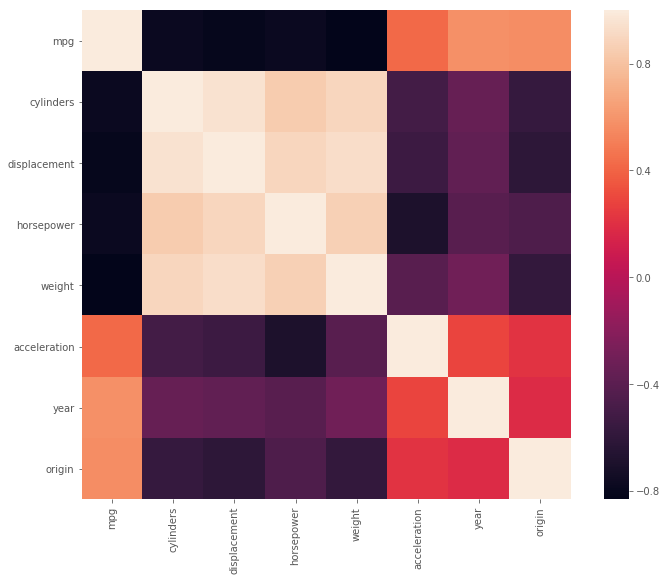

In [93]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [94]:
df2['mpg'].corr(df2['weight'])


-0.8322442148315753

In [95]:
# As expected, there seems to be a strong negative correlation between vehicle weight and mpg. 
# But what about horsepower or displacement? 
# We can quickly calculate correlation between all columns in a pandas dataframe. 


In [96]:
df2.drop(['year', 'origin'], axis=1).corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [97]:
# Strongly correlated predictors, phenomenon referred to as multicollinearity, 
# will cause coefficient estimates to be less reliable. 


In [98]:
df2.drop(['year', 'origin'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.0,-0.78,-0.81,-0.78,-0.83,0.42
cylinders,-0.78,1.0,0.95,0.84,0.9,-0.5
displacement,-0.81,0.95,1.0,0.9,0.93,-0.54
horsepower,-0.78,0.84,0.9,1.0,0.86,-0.69
weight,-0.83,0.9,0.93,0.86,1.0,-0.42
acceleration,0.42,-0.5,-0.54,-0.69,-0.42,1.0


In [99]:
# Let's remove the features that have correlation higher than 0.9


In [100]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.eye(len(df_corr), dtype=bool)).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [101]:
uncorrelated_factors = trimm_correlated(df2, 0.9)
df3 = uncorrelated_factors
df3.head()

,mpg,horsepower,acceleration,year,origin
1,18.0,130.0,12.0,70,1
2,15.0,165.0,11.5,70,1
3,18.0,150.0,11.0,70,1
4,16.0,150.0,12.0,70,1
5,17.0,140.0,10.5,70,1


In [102]:
#Now let's apply linear regression on uncorrelated attributes

X = df3.drop('mpg', axis=1)
y = df3[['mpg']]

from sklearn.model_selection import train_test_split

X = df3[['horsepower', 'acceleration', 'year', 'origin']]
y = df3['mpg']
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [103]:
#Let's train our model

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
#Let's see how our model predicts
predictions = regression_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,predictions))
rmse

4.124632961871129

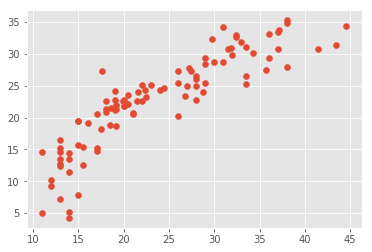

In [105]:
# Let's visualize it
plt.scatter(y_test,predictions)


In [106]:
#Now, let's try applying PCA and compare the results

In [107]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [109]:
# We load the features X and standardize it.

X = df2[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].apply(pd.to_numeric)
X_std = StandardScaler().fit_transform(X)

In [110]:
# Now, create the covariance matrix between each variable using this data.
# Here the ‘.T’ means we’re transposing the matrix. 

covariance_matrix = np.cov(X_std.T)

In [111]:
# Next, store the eigenvalues and eigenvectors of this matrix in arrays using numpy’s linear algebra library, ‘linalg’.

eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [112]:
# Finally, calculate the percentage of the variance that each variable explains using simple statistics. 

total_var = sum(eig_vals)
explained_var = [(i / total_var) for i in eig_vals]
print(explained_var)

[0.6719840378371837, 0.11795790771191646, 0.10145545586285172, 0.06076949210390799, 0.022853320959226764, 0.014290240775881233, 0.0039961924702568005, 0.00669335227877537]


In [113]:
# Using these values, we can determine that the first, second, and third variables (mpg, cylinders, displacement)
# are most essential to the model. Now, further tests for prediction must be ran before we can begin eliminating variables,
# but this gives us a great intuition of how to begin constructing the most effective model for predicting mpg.  

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df2[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].apply(pd.to_numeric)
X_std = StandardScaler().fit_transform(X)

In [116]:
# Next, we’ll use the ‘PCA’ class from sklearn to find our principle components and then fit this to our model.

In [117]:
pca = PCA(n_components=3)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [118]:
# To confirm our results, PCA has an attribute called ‘explained_variance_ratio’ 
# which is the final step that we manually calculated in PCA method 1. 
# However, the attribute will return the percentage of variance explained by the each of the three 
# optimal principle components since we set ‘n_components =3’.

In [119]:
print(pca.explained_variance_ratio_)

[0.67198404 0.11795791 0.10145546]


In [120]:
# As expected, this results in first, second, and third variables just as we identified in the covariance method.
# Since, these three features (mpg, cylinders, displacement) are the most correlated they may cause multicollinearity.
# We should apply feature reduction on these attributes.

